# **Sentiment Detection by Audio Analysis**

---



### **Importing Modules**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import librosa
import librosa.display
import matplotlib.pyplot as plt
!pip install transformers --upgrade
!pip install transformers datasets accelerate
!pip install -q torchaudio
from transformers import TFAutoModelForAudioClassification, TrainingArguments, Trainer
from datasets import Dataset
from transformers import create_optimizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, BatchNormalization
from keras.layers import Reshape,Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from sklearn import metrics
!pip install noisereduce
import noisereduce as nr
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import os
import glob
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 85.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.3
    Uninstalling transformers-4.46.3:
      Successfully uninstalled transformers-4.46.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.4 MB/s eta 0:00:00
  Attempti

### **Loading Dataset from the Drive**

In [ ]:
data = '/content/drive/MyDrive/BIA/archive'

### **Creating a DataFrame for Audio Labels and Paths**

In [ ]:
label = []
path = []
for subfolder in os.listdir(data):
  subfolder_path = os.path.join(data, subfolder)
  if os.path.isdir(subfolder_path): #to make sure only folders are being accessed
    for file_path in glob.glob(os.path.join(subfolder_path, '*.wav')): #considering .wav files
      path.append(file_path)
      label.append(subfolder)

df = pd.DataFrame()
df['path'] = path
df['label'] = label
print(df.head())


                                                path  label
0  /content/drive/MyDrive/BIA/archive/happy/1004_...  happy
1  /content/drive/MyDrive/BIA/archive/happy/1007_...  happy
2  /content/drive/MyDrive/BIA/archive/happy/1005_...  happy
3  /content/drive/MyDrive/BIA/archive/happy/1006_...  happy
4  /content/drive/MyDrive/BIA/archive/happy/1007_...  happy


### **Analysing the Dataframe**

In [ ]:
print(df.info())
pd.unique(df['label'])
print(df['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6522 entries, 0 to 6521
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    6522 non-null   object
 1   label   6522 non-null   object
dtypes: object(2)
memory usage: 102.0+ KB
None
label
happy         1087
fear          1087
disgusting    1087
sad           1087
angry         1087
neutral       1087
Name: count, dtype: int64


## **Exploratory Data Analysis**

### **Visualizing Categories and Counts of Emotion-Differentiated Audio Files**

<Axes: xlabel='count', ylabel='label'>

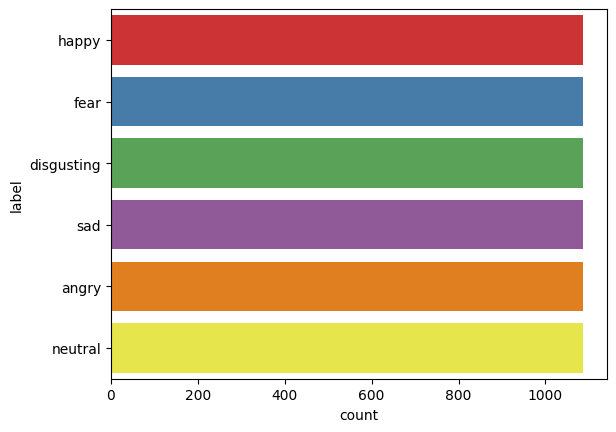

In [ ]:
sns.countplot(df['label'], palette='Set1')



### **Creating a Function to Display Waveplots for Emotion-Categorized Audio Files**

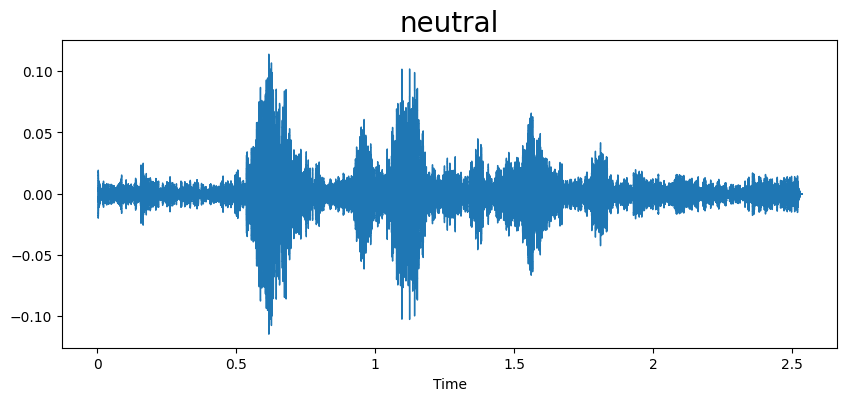

In [ ]:
def waveplot(df, emotion):
  path = df[df['label'] == emotion]['path'].values[1]
  data, sr = librosa.load(path)
  plt.figure(figsize=(10, 4))
  plt.title(emotion, size=20) # Display the specific emotion in the title
  librosa.display.waveshow(data, sr=sr)
  plt.show()
  display(Audio(path))


waveplot(df, 'neutral')



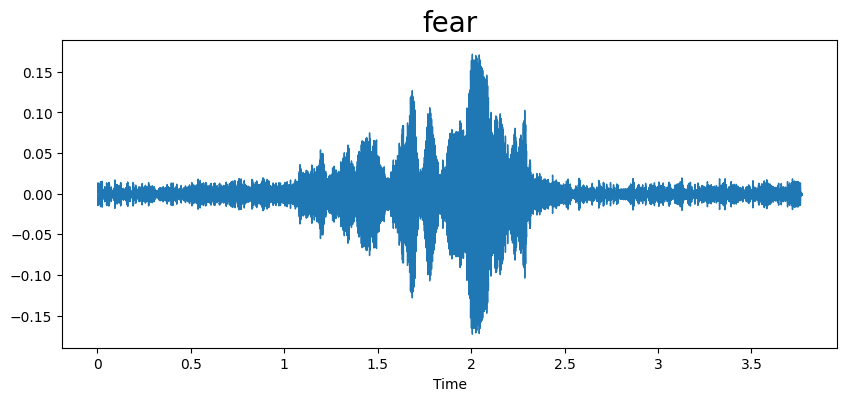

In [ ]:
waveplot(df, 'fear')


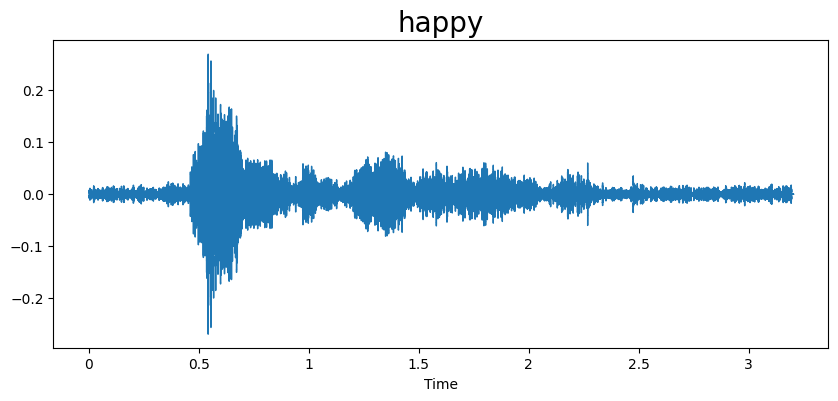

In [ ]:
waveplot(df, 'happy')


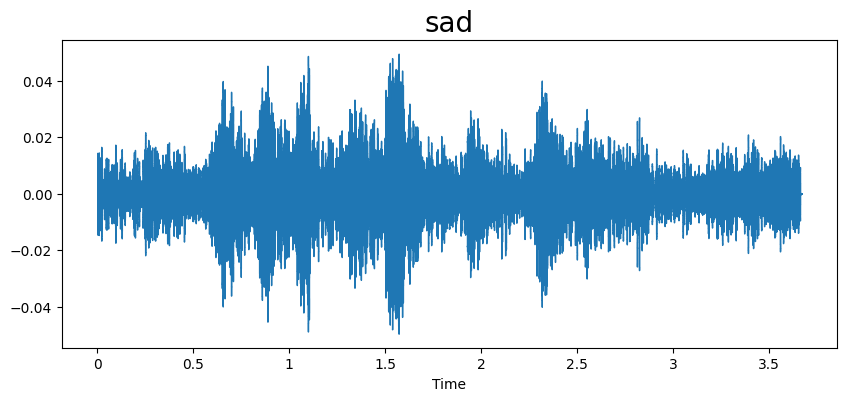

In [ ]:
waveplot(df, 'sad')


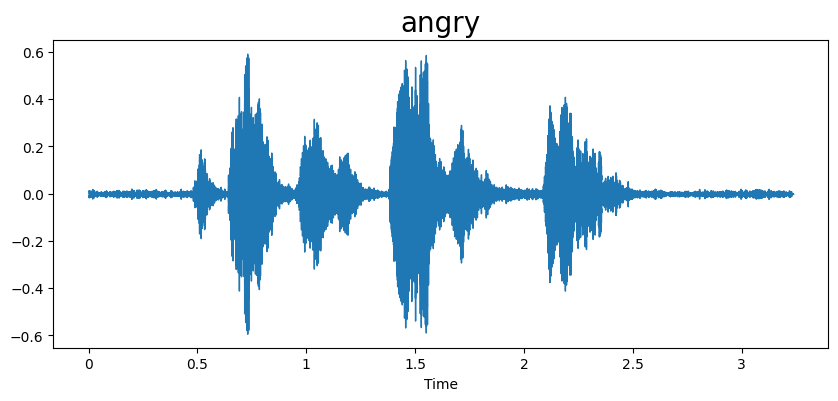

In [ ]:
waveplot(df, 'angry')


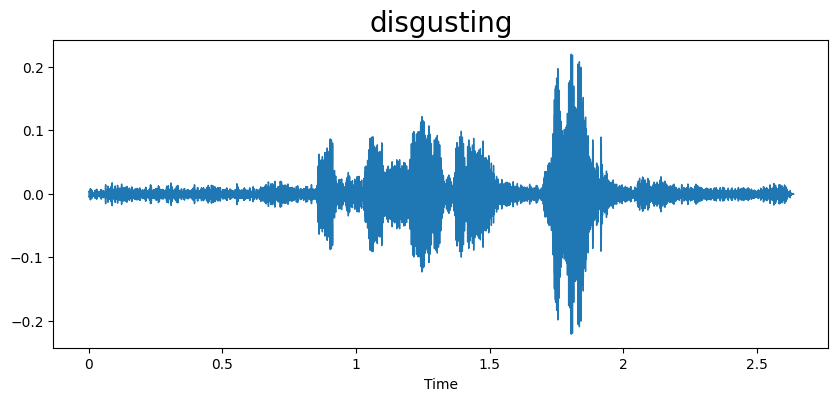

In [ ]:
waveplot(df, 'disgusting')

### **Creating a Function to Display Spectrograms of Emotion-Categorized Audio Files**

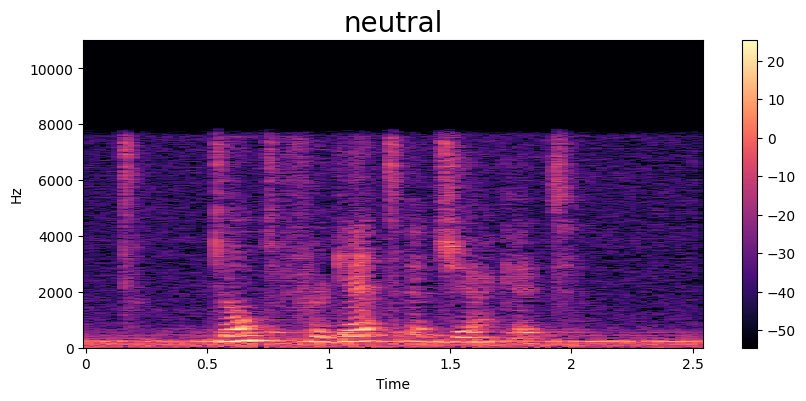

In [ ]:
def spectogram(df,emotion):
  path=df[df['label']==emotion]['path'].values[1]
  data,sr=librosa.load(path)
  x=librosa.stft(data)
  xdb=librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()
  display(Audio(path))

spectogram(df,'neutral')

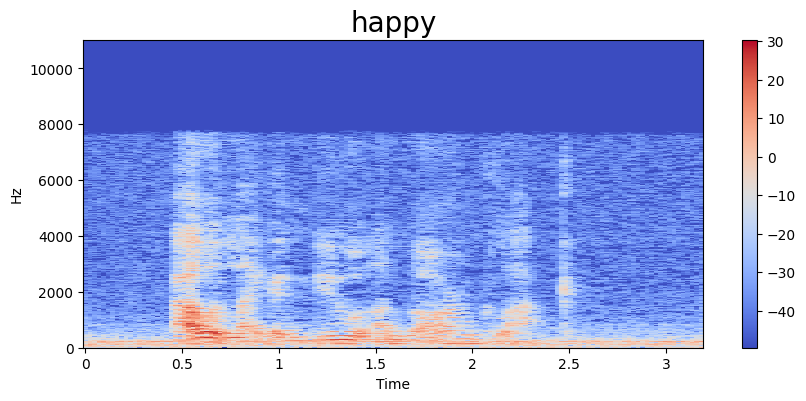

In [ ]:
spectogram(df,'happy')

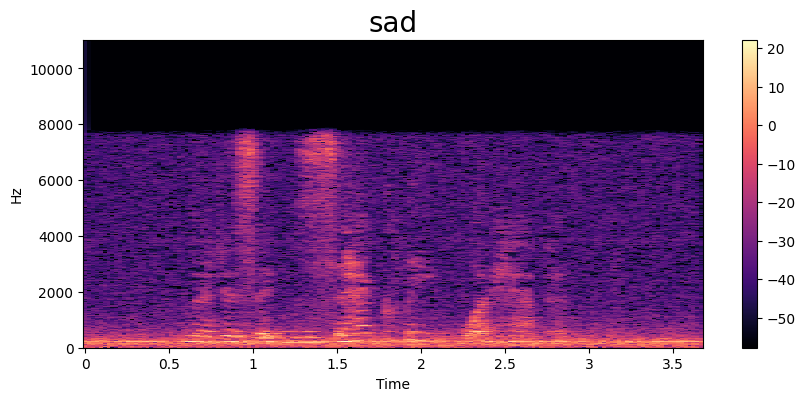

In [ ]:
spectogram(df,'sad')

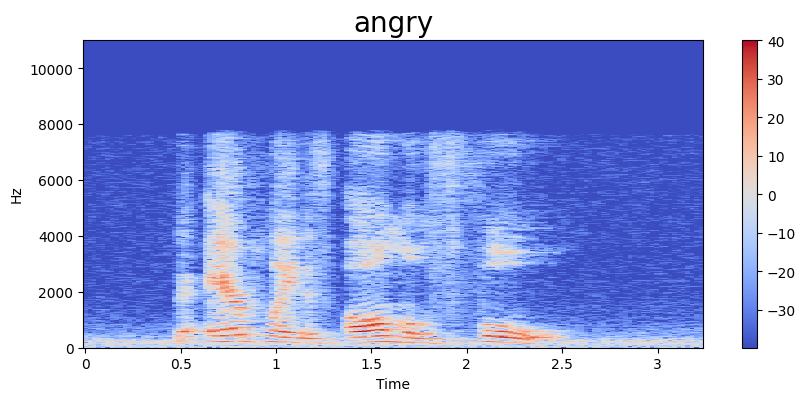

In [ ]:
spectogram(df,'angry')

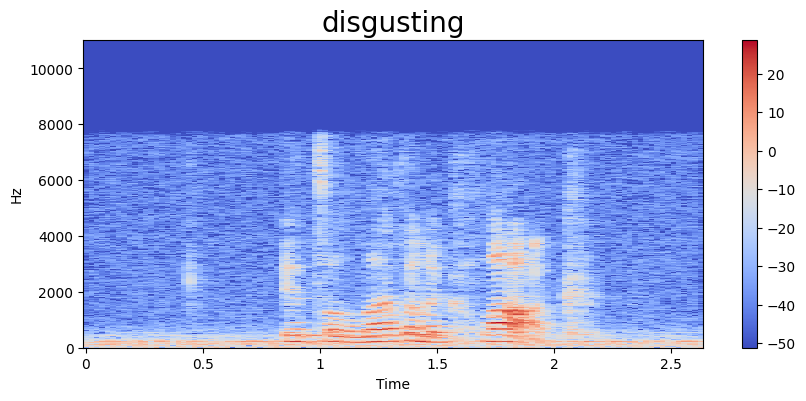

In [ ]:
spectogram(df,'disgusting')

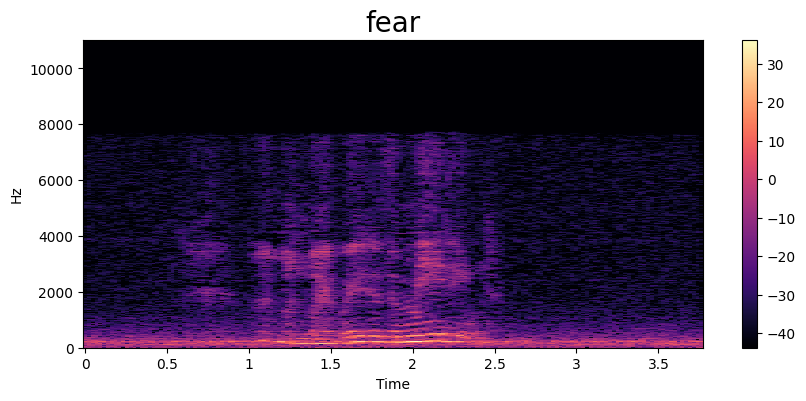

In [ ]:
spectogram(df,'fear')

## **Extracting Features**

### **Removing Silent Audio Files**

In [ ]:
def is_silent(file_path, threshold=0.001):
    """Checks if an audio file is silent based on RMS amplitude."""
    data, sr = librosa.load(file_path)
    rms = np.sqrt(np.mean(data**2))
    if rms < threshold:
        print(f"Silent file: {file_path}")
        display(Audio(file_path))
    return rms < threshold

def pad_audio(data, sr, target_duration):
    """Pads audio with silence to reach the target duration."""
    current_duration = len(data) / sr
    if current_duration < target_duration:
        padding_length = int((target_duration - current_duration) * sr)
        data = np.pad(data, (0, padding_length), mode='constant')
    return data



# 1. Remove silent audio files

df_cleaned = df[~df['path'].apply(is_silent)]

# 2. Undersample to ensure equal distribution
min_samples = df_cleaned['label'].value_counts().min()
df_balanced = pd.DataFrame()
for emotion in df_cleaned['label'].unique():
    df_emotion = df_cleaned[df_cleaned['label'] == emotion]
    df_balanced = pd.concat([df_balanced, df_emotion.sample(n=min_samples, random_state=42)])









Silent file: /content/drive/MyDrive/BIA/archive/sad/1076_MTI_SAD_XX.wav


In [ ]:
df_balanced.info()
print(df_balanced['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 6516 entries, 746 to 6479
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    6516 non-null   object
 1   label   6516 non-null   object
dtypes: object(2)
memory usage: 152.7+ KB
label
happy         1086
fear          1086
disgusting    1086
sad           1086
angry         1086
neutral       1086
Name: count, dtype: int64


### **Finding and Removing Outliers**

In [ ]:
def extract_audio_length(file_path):
    """Extracts the duration of an audio file."""
    try:
        y, sr = librosa.load(file_path)
        duration = librosa.get_duration(y=y, sr=sr)
        return duration
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return np.nan  # Return NaN for files with errors

# Calculate audio lengths for all files in df_balanced
df_balanced['audio_length'] = df_balanced['path'].apply(extract_audio_length)

# Calculate the Interquartile Range (IQR) for audio lengths
Q1 = df_balanced['audio_length'].quantile(0.25)
Q3 = df_balanced['audio_length'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outlier detection
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
outliers = df_balanced[(df_balanced['audio_length'] < lower_bound) | (df_balanced['audio_length'] > upper_bound)]

# Print or display the outliers
print("Outliers:")
print(outliers)

Outliers:
                                                   path    label  audio_length
859   /content/drive/MyDrive/BIA/archive/happy/1067_...    happy      3.970658
1053  /content/drive/MyDrive/BIA/archive/happy/1005_...    happy      4.204218
1031  /content/drive/MyDrive/BIA/archive/happy/1003_...    happy      3.903900
1075  /content/drive/MyDrive/BIA/archive/happy/1006_...    happy      3.903900
1090  /content/drive/MyDrive/BIA/archive/fear/1007_I...     fear      3.870567
...                                                 ...      ...           ...
5454  /content/drive/MyDrive/BIA/archive/neutral/100...  neutral      4.371066
5461  /content/drive/MyDrive/BIA/archive/neutral/100...  neutral      4.771474
6459  /content/drive/MyDrive/BIA/archive/neutral/100...  neutral      4.070794
6463  /content/drive/MyDrive/BIA/archive/neutral/100...  neutral      4.037415
6497  /content/drive/MyDrive/BIA/archive/neutral/100...  neutral      3.937279

[117 rows x 3 columns]


In [ ]:
# Remove outliers
df_balanced = df_balanced[(df_balanced['audio_length'] >= lower_bound) & (df_balanced['audio_length'] <= upper_bound)]
# Print the shape of the DataFrame after removing outliers
print("Shape of DataFrame after removing outliers:", df_balanced.shape)

Shape of DataFrame after removing outliers: (6399, 3)


### **Ensuring Equal Distribution of Audio Files**

In [ ]:
# Get the minimum class count
min_samples = df_balanced['label'].value_counts().min()

# Create a dictionary to store balanced dataframes for each emotion
balanced_dataframes = {}

# Undersample each emotion class
for emotion in df_balanced['label'].unique():
    emotion_df = df_balanced[df_balanced['label'] == emotion]
    balanced_dataframes[emotion] = emotion_df.sample(n=min_samples, random_state=42)

# Concatenate the balanced dataframes
df_balanced = pd.concat(balanced_dataframes.values())

# Print the label distribution of the balanced dataframe
print(df_balanced['label'].value_counts())

label
happy         1034
fear          1034
disgusting    1034
sad           1034
angry         1034
neutral       1034
Name: count, dtype: int64


In [ ]:
df_balanced.info()
print(df_balanced['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 6204 entries, 513 to 5969
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   path          6204 non-null   object 
 1   label         6204 non-null   object 
 2   audio_length  6204 non-null   float64
dtypes: float64(1), object(2)
memory usage: 193.9+ KB
label
happy         1034
fear          1034
disgusting    1034
sad           1034
angry         1034
neutral       1034
Name: count, dtype: int64


### **Using MFCC Method to Extract Features**

In [ ]:
def extract_features_mfcc(filename):
  try:
  # Load audio file
   data, sr = librosa.load(filename, duration=3, offset=0.5)
  # Pad if shorter than 3 seconds
   data = pad_audio(data, sr, target_duration=3)
  # Extract MFCCs
   mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40)
  # Calculate the mean of MFCCs across frames
   mfccs = np.mean(mfccs.T, axis=0)
   return mfccs
  except Exception as e:
   print(f"Error processing {filename}: {e}")
   return None

In [ ]:
# 3. Extract features
features = []
for file_path in df_balanced['path']:
    feature = extract_features_mfcc(file_path)
    features.append(feature)
print(features)


Output hidden; open in https://colab.research.google.com to view.

### **Extracting X and Y values**

In [ ]:
x = np.expand_dims(features, -1)
print(x.shape)
print(x)

(6204, 40, 1)
[[[-5.01362305e+02]
  [ 6.94969940e+01]
  [ 7.96609744e-02]
  ...
  [-4.47522789e-01]
  [ 3.31370533e-01]
  [ 1.01840317e+00]]

 [[-3.78298798e+02]
  [ 1.09122765e+02]
  [-8.93154907e+00]
  ...
  [-1.37564409e+00]
  [-5.72260329e-03]
  [-2.26042652e+00]]

 [[-5.48939758e+02]
  [ 6.29726562e+01]
  [-2.33219099e+00]
  ...
  [-1.18452787e+00]
  [ 9.62056577e-01]
  [-4.88548189e-01]]

 ...

 [[-5.12666382e+02]
  [ 9.06904526e+01]
  [ 6.20839643e+00]
  ...
  [-6.37910128e-01]
  [-8.66671264e-01]
  [-6.64865553e-01]]

 [[-5.06953247e+02]
  [ 9.47989349e+01]
  [ 9.69190788e+00]
  ...
  [-1.54502022e+00]
  [-5.63321188e-02]
  [ 5.55850454e-02]]

 [[-6.54943298e+02]
  [ 7.16114197e+01]
  [ 4.96204042e+00]
  ...
  [-1.27790496e-01]
  [ 1.45382965e+00]
  [ 4.96732853e-02]]]


In [ ]:
onehotencoder = OneHotEncoder()
y = onehotencoder.fit_transform(df_balanced[['label']])
y = y.toarray()
print(y)
print(y.shape)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]]
(6204, 6)


### **Training_Testing_Splitting**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(4963, 40, 1)
(1241, 40, 1)
(4963, 6)
(1241, 6)


# **Best Performing Models**

## **CNN Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
# Create the CNN model
cnn_model = Sequential()  # Changed model to cnn_model
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x.shape[1], x.shape[2])))  # Adjust input shape if needed
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))  # Add dropout for regularization
cnn_model.add(Dense(6, activation='softmax'))  # 6 output classes for emotions

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(x, y, epochs=100, batch_size=13, validation_split=0.20)

# Evaluate the model
loss, accuracy = cnn_model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Epoch 1/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2722 - loss: 2.4072 - val_accuracy: 0.0806 - val_loss: 5.4703
Epoch 2/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3598 - loss: 1.4628 - val_accuracy: 0.0983 - val_loss: 5.7826
Epoch 3/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3960 - loss: 1.3871 - val_accuracy: 0.0951 - val_loss: 7.6278
Epoch 4/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4171 - loss: 1.3497 - val_accuracy: 0.0580 - val_loss: 8.2847
Epoch 5/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4286 - loss: 1.3468 - val_accuracy: 0.0927 - val_loss: 8.6841
Epoch 6/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4363 - loss: 1.3177 - val_accuracy: 0.0822 - val_loss: 10.0492
Epoch 7/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4457 - loss: 1.3011 - val_accuracy: 0.0886 - val_loss: 8.9249
Epoch 8/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4597 - loss: 1.2747 - val_acc

### **Saving Model**

In [ ]:
cnn_model.save('/content/drive/MyDrive/BIA/cnn_model.h5')

### **Predictions**

In [ ]:
y_pred = cnn_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


### **Evaluations**

In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

# Evaluate the model
score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Accuracy: 0.7510072522159549
Precision: 0.6446093194673406
Recall: 0.7510072522159549
F1-score: 0.6882836388936223
Confusion Matrix:
[[153   8   8  21   0   1]
 [  1 181   8   0   0  17]
 [  1   6 192   4   0  15]
 [  2   2   5 207   0   1]
 [  1  47  46  39   0  64]
 [  0   2   9   1   0 199]]
Test loss: 12.155510902404785
Test accuracy: 0.7510072588920593


### **Plotting Evaluations**

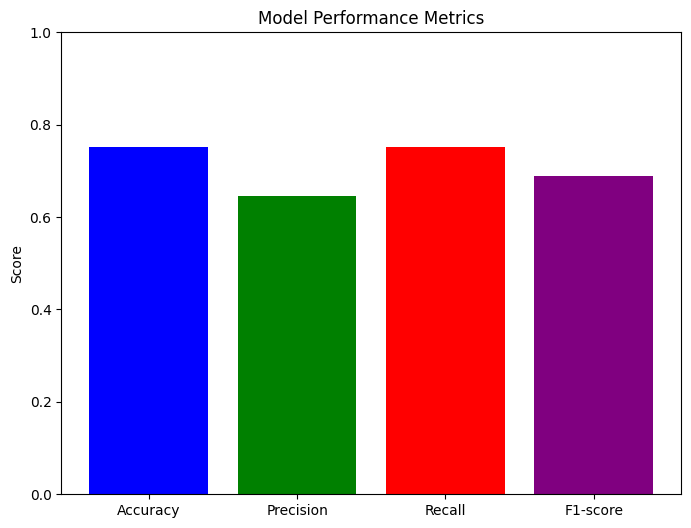

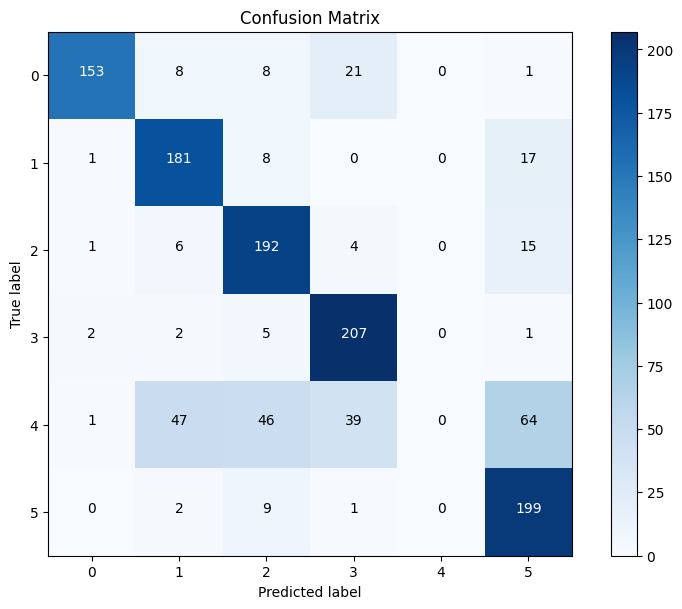

In [ ]:
# Plotting the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for better visualization
plt.show()


# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_true_classes)))
plt.xticks(tick_marks, np.unique(y_true_classes))
plt.yticks(tick_marks, np.unique(y_true_classes))

# Add labels to each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## **LSTM Model**

In [ ]:
# Define the model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(40, 1)))
model.add(BatchNormalization())
model.add(LSTM(64, return_sequences=False))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))  # 6 output classes for emotions

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(x, y, epochs=100, batch_size=11, validation_split=0.25)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 40, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 40, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,286 (473.77 KB)

 Trainable params: 120,902 (472.27 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.2637 - loss: 1.7647 - val_accuracy: 0.0658 - val_loss: 5.9904
Epoch 2/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3644 - loss: 1.4507 - val_accuracy: 0.0413 - val_loss: 11.1096
Epoch 3/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3902 - loss: 1.4062 - val_accuracy: 0.0322 - val_loss: 6.0731
Epoch 4/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4008 - loss: 1.3642 - val_accuracy: 0.0587 - val_loss: 10.0427
Epoch 5/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.4031 - loss: 1.3566 - val_accuracy: 0.0374 - val_loss: 7.1121
Epoch 6/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.4245 - loss: 1.3280 - val_accuracy: 0.1496 - val_loss: 9.3431
Epoch 7/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4229 - loss: 1.3355 - val_accuracy: 0.1090 - val_loss: 6.3373
Epoch 8/100
423/423 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4358 - loss: 1.3028 - 

### **Saving Model**

In [ ]:
model.save('/content/drive/MyDrive/BIA/lstm_model.h5')

### **Predictions**

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


### **Evaluation**

In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Accuracy: 0.7800161160354553
Precision: 0.6642824101080875
Recall: 0.7800161160354553
F1-score: 0.7117455807473493
Confusion Matrix:
[[139  11  10  26   0   5]
 [  1 202   0   1   0   3]
 [  2   0 204   2   0  10]
 [  0   0   2 215   0   0]
 [ 13  46  32  42   0  64]
 [  0   0   3   0   0 208]]
Test loss: 9.433497428894043
Test accuracy: 0.7800161242485046


### **Plotting Results**

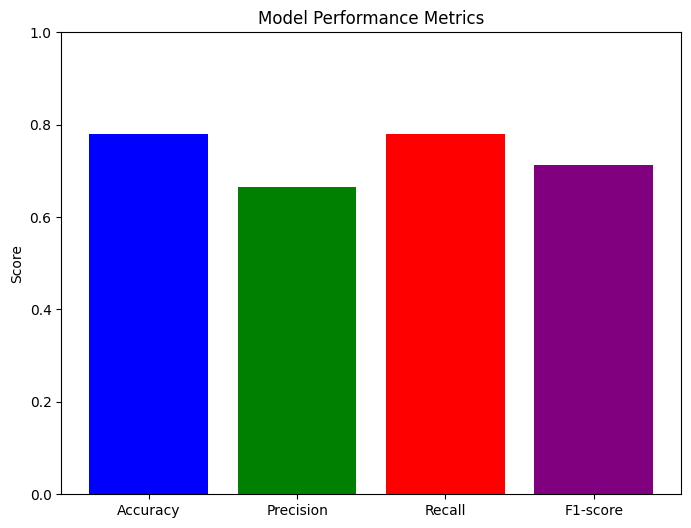

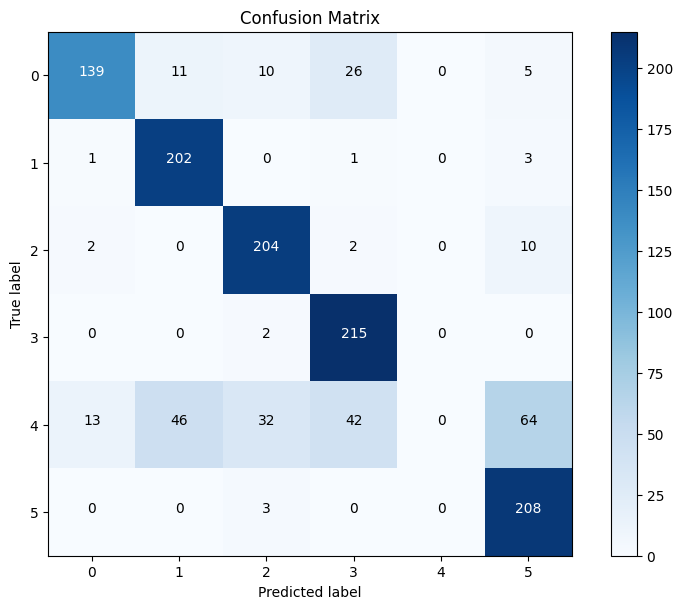

In [ ]:
# Plotting the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for better visualization
plt.show()


# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_true_classes)))
plt.xticks(tick_marks, np.unique(y_true_classes))
plt.yticks(tick_marks, np.unique(y_true_classes))

# Add labels to each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# **Other Models**

## **Decision Tree Model**

In [ ]:
num_samples = x_train.shape[0]
num_features = x_train.shape[1] * x_train.shape[2]  # Combine time steps and features

# Reshape x_train to (num_samples, num_features)
x_train_2d = x_train.reshape(num_samples, num_features)

# Reshape x_test similarly
x_test_2d = x_test.reshape(x_test.shape[0], num_features)

# Now apply StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_2d)
x_test_scaled = scaler.transform(x_test_2d)

# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

### **Predictions**

In [ ]:
# Reshape x_test to 2D
num_samples = x_test.shape[0]
num_features = x_test.shape[1] * x_test.shape[2]  # Combine time steps and features
x_test_2d = x_test.reshape(num_samples, num_features)

# Now use x_test_2d for prediction
y_pred = model.predict(x_test_2d)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels

### **Evaluation**

In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.15551974214343273
Precision: 0.089131621659755
Recall: 0.15551974214343273
F1-score: 0.0840274891419158
Confusion Matrix:
[[  0 123  33   5   5  25]
 [  3 156  21   1   6  20]
 [  1 172  18   1   5  21]
 [  6 151  28   0   7  25]
 [  3 155  16   0   3  20]
 [  1 171  20   0   3  16]]


### **Plotting Results**

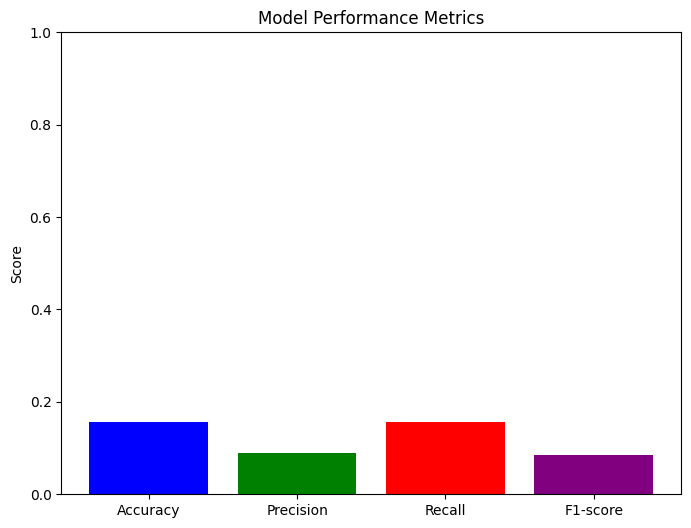

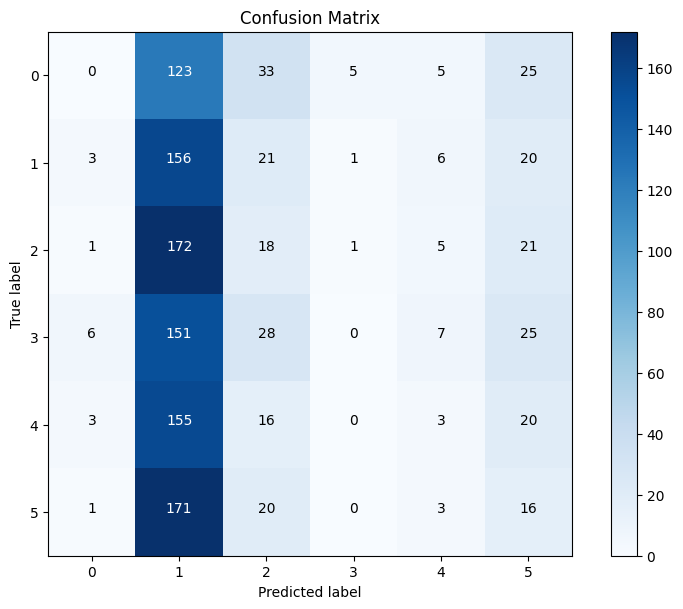

In [ ]:
# Plotting the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for better visualization
plt.show()


# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_true_classes)))
plt.xticks(tick_marks, np.unique(y_true_classes))
plt.yticks(tick_marks, np.unique(y_true_classes))

# Add labels to each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## **SVM**

In [ ]:
# Reshape for StandardScaler
num_samples = x_train.shape[0]
num_features = x_train.shape[1] * x_train.shape[2]
x_train_2d = x_train.reshape(num_samples, num_features)
x_test_2d = x_test.reshape(x_test.shape[0], num_features)

# Apply StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_2d)
x_test_scaled = scaler.transform(x_test_2d)

# Convert y to 1D for SVM
y_train_1d = np.argmax(y_train, axis=1)
y_test_1d = np.argmax(y_test, axis=1)

# Create and train the SVM model
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(x_train_scaled, y_train_1d)

# Make predictions and evaluate
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test_1d, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.4383561643835616


### **Predictions**

In [ ]:
# Reshape x_test to 2D (this part remains the same)
num_samples = x_test.shape[0]
num_features = x_test.shape[1] * x_test.shape[2]  # Combine time steps and features
x_test_2d = x_test.reshape(num_samples, num_features)

# Now use x_test_2d for prediction with the SVC model
y_pred = model.predict(x_test_2d)

y_pred_classes = y_pred

y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels

### **Evaluations**

In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted') '
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.17002417405318293
Precision: 0.028908219762467043
Recall: 0.17002417405318293
F1-score: 0.049414739290938835
Confusion Matrix:
[[  0   0   0   0   0 191]
 [  0   0   0   0   0 207]
 [  0   0   0   0   0 218]
 [  0   0   0   0   0 217]
 [  0   0   0   0   0 197]
 [  0   0   0   0   0 211]]


### **Plotting Evaluations**

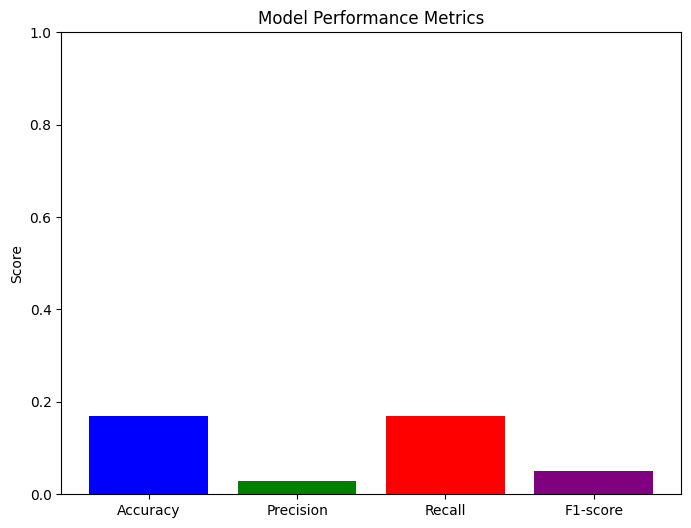

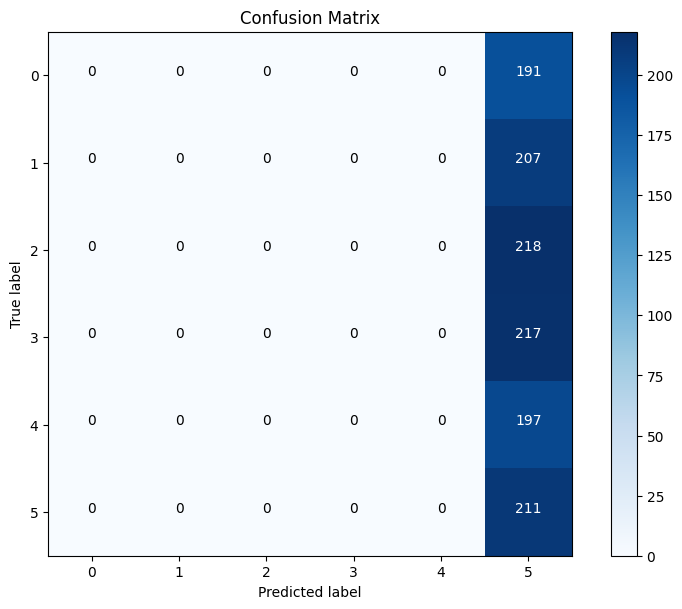

In [ ]:
# Plotting the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for better visualization
plt.show()


# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_true_classes)))
plt.xticks(tick_marks, np.unique(y_true_classes))
plt.yticks(tick_marks, np.unique(y_true_classes))

# Add labels to each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## **Combined Neural Network (CNN+RNN)**

### **Using Spectogram Method to Extract Features**

In [ ]:
def extract_features_spectrogram(file_path,max_length=128):
    """Extracts features from an audio file using a spectrogram.

    Args:
        file_path (str): Path to the audio file.

    Returns:
        np.ndarray: Spectrogram features.
    """
    try:
        # Load audio file
        data, sr = librosa.load(file_path, duration=3, offset=0.5)

        # Compute spectrogram
        spectrogram = librosa.feature.melspectrogram(y=data, sr=sr)
        #spectrogram = librosa.amplitude_to_db(abs(librosa.stft(y)))#alternative method
        #spectrogram = librosa.power_to_db(spectrogram, ref=np.max)#alternative method

        # Convert to decibels (log scale) for better visualization and analysis
        spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
        #spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)#alternative method

        # Pad or truncate spectrogram to max_length
        spectrogram_db = librosa.util.fix_length(spectrogram_db, size=max_length)

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

    return spectrogram_db  # Return the spectrogram in decibels

In [ ]:
# 3. Extract features
features_spectrogram = []
for file_path in df_balanced['path']:
    feature = extract_features_spectrogram(file_path)
    features_spectrogram.append(feature)
print(features_spectrogram)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
x=np.array(features_spectrogram)
print(x)
print(x.shape)


[[[-37.999332 -41.608032 -37.490532 ...   0.         0.         0.      ]
  [-33.9112   -36.47163  -39.59178  ...   0.         0.         0.      ]
  [-35.384285 -35.80352  -35.035206 ...   0.         0.         0.      ]
  ...
  [-80.       -80.       -80.       ...   0.         0.         0.      ]
  [-80.       -80.       -80.       ...   0.         0.         0.      ]
  [-80.       -80.       -80.       ...   0.         0.         0.      ]]

 [[-42.816006 -41.768913 -36.67578  ...   0.         0.         0.      ]
  [-39.942333 -38.54563  -38.598137 ...   0.         0.         0.      ]
  [-34.62732  -31.476997 -35.55389  ...   0.         0.         0.      ]
  ...
  [-80.       -80.       -80.       ...   0.         0.         0.      ]
  [-80.       -80.       -80.       ...   0.         0.         0.      ]
  [-80.       -80.       -80.       ...   0.         0.         0.      ]]

 [[-32.149265 -29.161346 -28.887096 ...   0.         0.         0.      ]
  [-37.562325 -34.6551

In [ ]:
onehotencoder = OneHotEncoder()
y = onehotencoder.fit_transform(df_balanced[['label']])
y = y.toarray()
print(y)
print(y.shape)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]]
(6204, 6)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, Reshape, BatchNormalization, Bidirectional

# Define the model
model = Sequential()

# Convolutional layers for feature extraction
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Reshape for RNN input
model.add(Reshape((-1, 64)))

# Bidirectional LSTM for sequential modeling
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(BatchNormalization())

# Dense layers for classification
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1024, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 1024, 256)           │         197,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1024, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 390,982 (1.49 MB)

 Trainable params: 390,214 (1.49 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 28s 165ms/step - accuracy: 0.2974 - loss: 1.8214 - val_accuracy: 0.1782 - val_loss: 1.8236
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 161ms/step - accuracy: 0.3226 - loss: 1.6259 - val_accuracy: 0.2155 - val_loss: 1.8111
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 165ms/step - accuracy: 0.3471 - loss: 1.5645 - val_accuracy: 0.2467 - val_loss: 1.7587
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 40s 156ms/step - accuracy: 0.3708 - loss: 1.5304 - val_accuracy: 0.1893 - val_loss: 1.9359
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 161ms/step - accuracy: 0.3814 - loss: 1.5226 - val_accuracy: 0.2095 - val_loss: 2.7512
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 156ms/step - accuracy: 0.3724 - loss: 1.5232 - val_accuracy: 0.3907 - val_loss: 1.5084
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 160ms/step - accuracy: 0.3919 - loss: 1.4936 - val_accuracy: 0.2296 - val_loss: 2.0097
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 155ms/step - accuracy: 0.3930 - loss: 1

### **Predictions**

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels

39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step


### **Evaluations**

In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Accuracy: 0.2731668009669621
Precision: 0.3568631132943033
Recall: 0.2731668009669621
F1-score: 0.2286800586388643
Confusion Matrix:
[[  6  13 125  25  10  12]
 [  1  16  98   6   9  77]
 [  2  10 110  20  13  63]
 [  0   6 137  30  15  29]
 [  0   1  78   4  34  80]
 [  1  10  52   0   5 143]]
Test loss: 1.9096689224243164
Test accuracy: 0.27316680550575256


### **Plotting Evaluations**

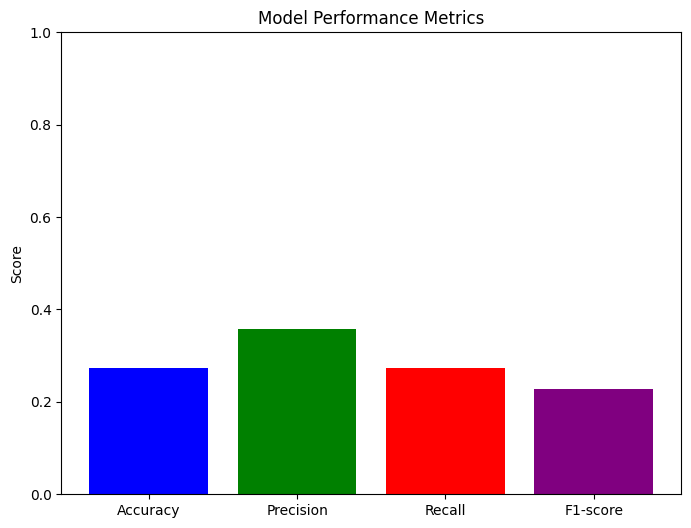

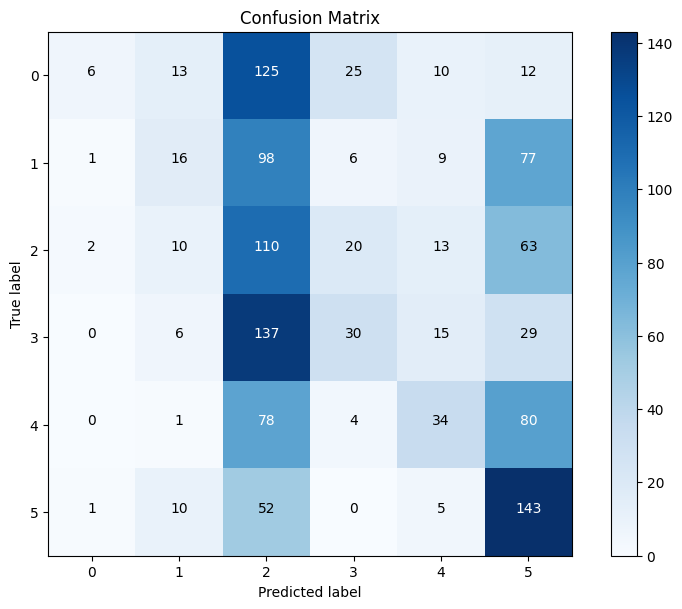

In [ ]:
# Plotting the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for better visualization
plt.show()


# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_true_classes)))
plt.xticks(tick_marks, np.unique(y_true_classes))
plt.yticks(tick_marks, np.unique(y_true_classes))

# Add labels to each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()